<a href="https://colab.research.google.com/github/LazaroR-u/Data-Science-Portfolio/blob/main/iris_and_wine_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
from sklearn.datasets import load_iris, load_wine
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

# Iris dataset

In [13]:
iris = datasets.load_iris()

df_iris = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
    )

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Descripcion general de los datos

In [16]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [14]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Nans en los datos

In [15]:
df_iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Valores vacios

In [18]:
missing_values_count = df_iris.isnull().sum()
missing_values_count

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Porcentaje de datos vacios

In [19]:
import numpy as np

total_cells = np.product(df_iris.shape)
total_missing = missing_values_count.sum()

# porcentaje de data perdida
percent_missing = (total_missing/total_cells)
print("Percentage Missing:", "{:.2%}".format(percent_missing))

Percentage Missing: 0.00%


In [21]:
raw_data_na_dropped = df_iris.dropna()

raw_data_na_dropped

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
# ¿Cuántas filas eliminaremos?
dropped_rows_count = df_iris.shape[0]-raw_data_na_dropped.shape[0]
print("filas eliminadas del dataset original %d \n" % dropped_rows_count)

# Porcentaje de filas eliminadas
percent_dropped = dropped_rows_count/df_iris.shape[0]
print("Porcentaje perdido:", "{:.2%}".format(percent_dropped))

filas eliminadas del dataset original 0 

Porcentaje perdido: 0.00%


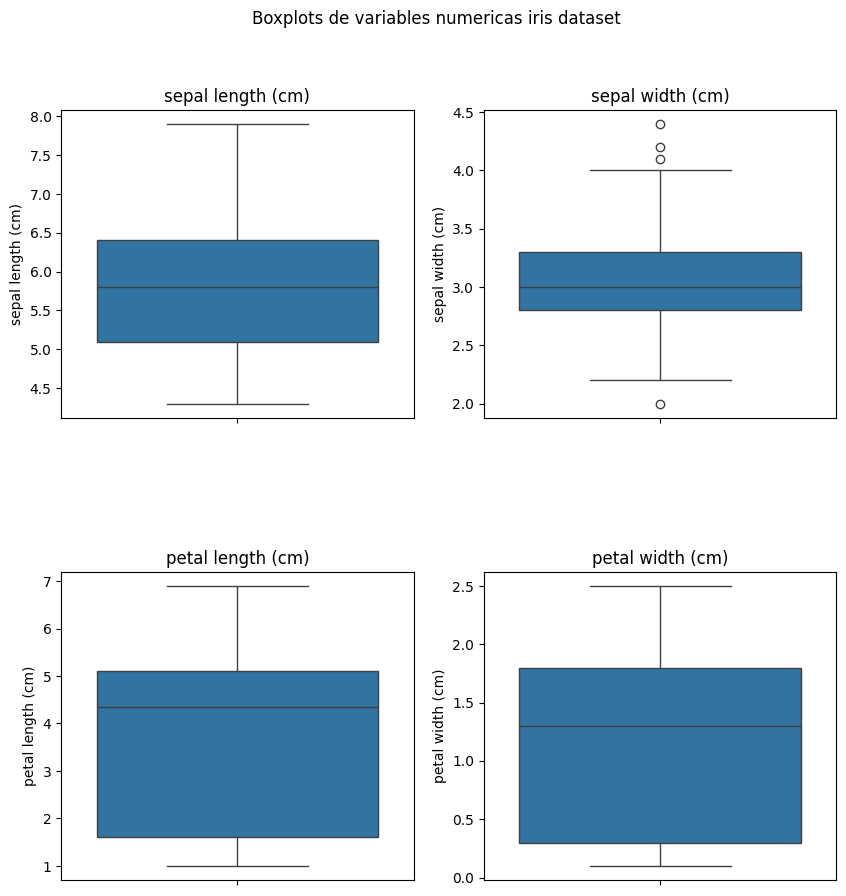

In [34]:
# Crea una figura con 10 subplots (uno para cada columna)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)  # Ajusta el espacio entre los subplots

# Itera a través de las columnas y crea los boxplots
for i, column in enumerate(df_iris.columns):
    row = i // 2
    col = i % 2
    sns.boxplot(data=df_iris, y=column, ax=axes[row, col])
    axes[row, col].set_title(column)

# Añade un título general a la figura
fig.suptitle('Boxplots de variables numericas iris dataset')

# Muestra la figura
plt.show()

<Axes: >

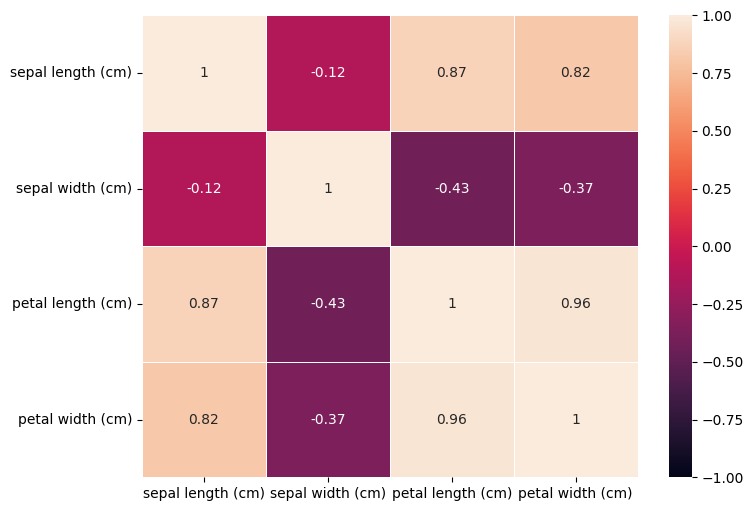

In [49]:
plt.figure(figsize= (8,6))
sns.heatmap(df_iris.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5)

# Wine dataset

In [11]:
wine = datasets.load_wine()

df_wine = pd.DataFrame(
    wine.data,
    columns=wine.feature_names
)

df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [23]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [24]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


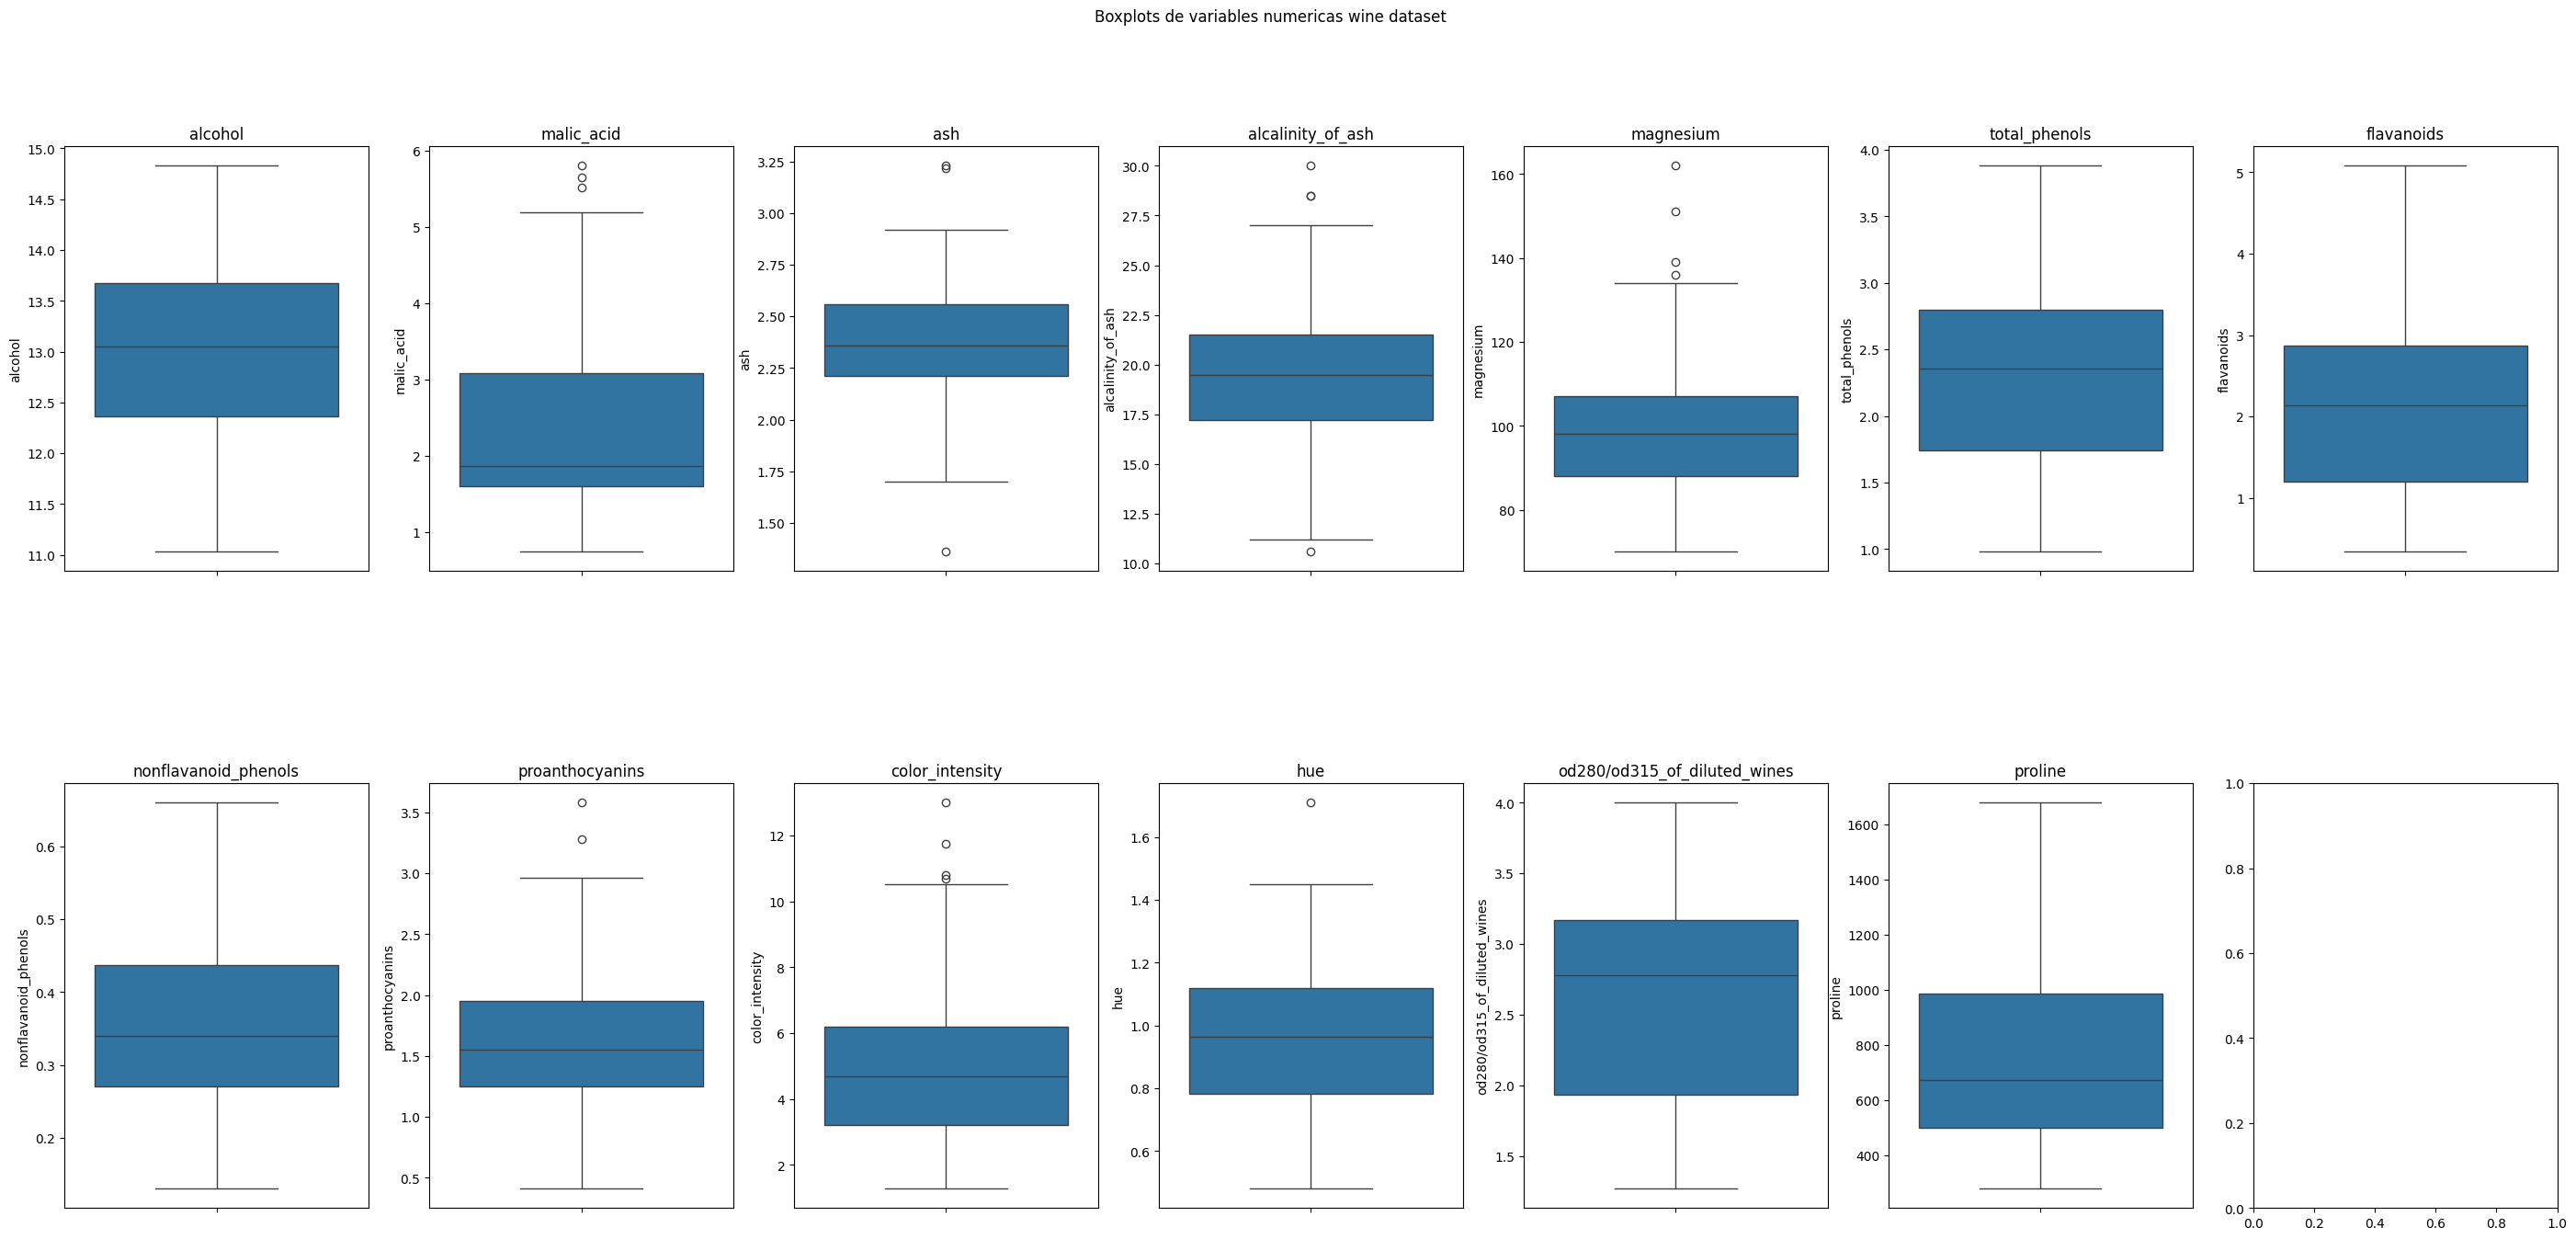

In [37]:
# Crea una figura con 10 subplots (uno para cada columna)
fig, axes = plt.subplots(2, 7, figsize=(35, 15))
fig.subplots_adjust(hspace=0.5)  # Ajusta el espacio entre los subplots

# Itera a través de las columnas y crea los boxplots
for i, column in enumerate(df_wine.columns):
    row = i // 7
    col = i % 7
    sns.boxplot(data=df_wine, y=column, ax=axes[row, col])
    axes[row, col].set_title(column)

# Añade un título general a la figura
fig.suptitle('Boxplots de variables numericas wine dataset')

# Muestra la figura
plt.show()

In [40]:
missing_values_count_wine = df_wine.isnull().sum()
wine_na_dropped = df_wine.dropna()
wine_na_dropped

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [41]:
# ¿Cuántas filas eliminaremos?
dropped_rows_count_wine = df_wine.shape[0]-wine_na_dropped.shape[0]
print("filas eliminadas del dataset original %d \n" % dropped_rows_count_wine)

# Porcentaje de filas eliminadas
percent_dropped_wine = dropped_rows_count/df_wine.shape[0]
print("Porcentaje perdido:", "{:.2%}".format(percent_dropped_wine))

filas eliminadas del dataset original 0 

Porcentaje perdido: 0.00%


<Axes: >

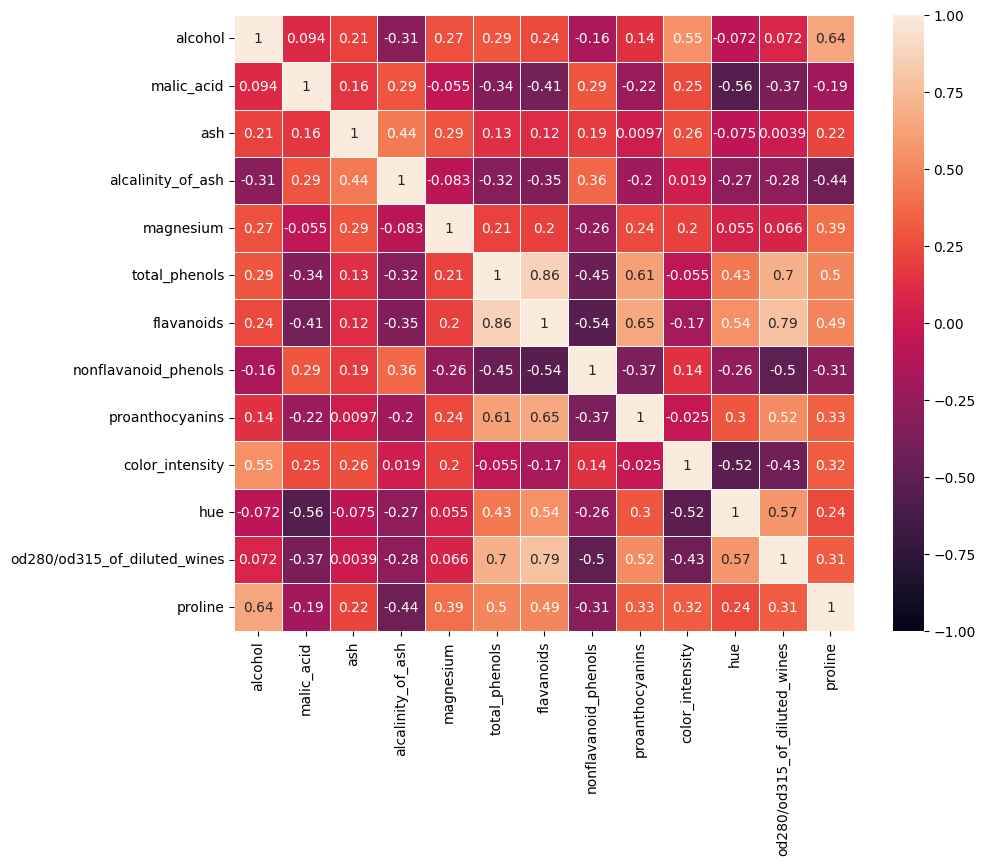

In [46]:
plt.figure(figsize= (10,8))
sns.heatmap(df_wine.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5)